In [134]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
N = (8 + 4 ) % 5 + 1 
print("Варіант №",N)
print("Вправи: 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18, 19, 20, 21, 23, 25, 27")

Варіант № 3
Вправи: 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18, 19, 20, 21, 23, 25, 27


In [136]:
#names = pd.read_csv(r'StateNames.csv')
names = pd.read_csv(r'NationalNames.csv')
names

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5


In [138]:
#1. Виведіть перші 8 рядків набору даних
names.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


In [140]:
#2. Вивести останні 8 рядків набору даних.
names.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [142]:
#4. Отримайте загальну інформацію про дані у наборі даних.
#names.describe()
names.describe(include='all') #про всі дані

,Id,Name,Year,Gender,Count
count,1.825433e+06,1825433,1.825433e+06,1825433,1.825433e+06
unique,NaN,93889,NaN,2,NaN
top,NaN,William,NaN,F,NaN
freq,NaN,270,NaN,1081683,NaN
mean,9.127170e+05,NaN,1.972620e+03,NaN,1.846879e+02
std,5.269573e+05,NaN,3.352891e+01,NaN,1.566711e+03
min,1.000000e+00,NaN,1.880000e+03,NaN,5.000000e+00
25%,4.563590e+05,NaN,1.949000e+03,NaN,7.000000e+00
50%,9.127170e+05,NaN,1.982000e+03,NaN,1.200000e+01
75%,1.369075e+06,NaN,2.001000e+03,NaN,3.200000e+01


In [144]:
#5. Знайдіть кількість унікальних імен у наборі даних
n = names['Name'].nunique()
print("Кількість унікальних імен: ",n)

Кількість унікальних імен:  93889


In [146]:
#6. Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі даних
malenames = names[names['Gender'] == 'M']['Name'].nunique()
femalenames = names[names['Gender'] == 'F']['Name'].nunique()
print("Кількість унікальних чоловічих імен:", malenames)
print("Кількість унікальних жіночих імен:",femalenames)

Кількість унікальних чоловічих імен: 39199
Кількість унікальних жіночих імен: 64911


In [148]:
#Варіант завдання 6 через групування даних
names.groupby(['Gender'])[['Name']].nunique()

,Name
Gender,
F,64911
M,39199


In [150]:
#7. Знайдіть 5 найпопулярніших чоловічих імен у 2010 році
mn2010 = names[(names['Year'] == 2010) & (names['Gender'] == 'M')].sort_values(by='Count', ascending=False).head()
mn2010

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


## **ascending = False** - сортування зі спаданням
## **sort_values** ( by='Count',ascending=False) - сортування по Count зі спаданням

In [152]:
#8. Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для  якого Count максимальне)
# name = names[(names['Year'] == 2006)].sort_values( by='Count',ascending=False).head(1)
# n2 = name['Name'].values[0]

name = names[(names['Year'] == 2006)]
n2 = name.loc[name['Count'].idxmax(), 'Name']
print(f"Імя <{ n2 }> найпопулярніше у 2006 році")

Імя <Jacob> найпопулярніше у 2006 році


In [155]:
#9. Підрахуйте кількість записів, для яких Count - мінімальне у наборі.
minC = names['Count'].min()
print("Count - мінімальне = ",minC)
kilkist = names[names['Count'] == minC].shape[0]
print("Кількість записів для який Count - мінімальне у наборі = ",kilkist)

Count - мінімальне =  5
Кількість записів для який Count - мінімальне у наборі =  254615


In [157]:
#10. Підрахуйте кількість унікальних імен у кожному році
#names.groupby(['Year']).agg({'Name':'nunique'}) #через агрегацію
names.groupby(['Year'])[['Name']].nunique()

,Name
Year,
1880,1889
1881,1830
1882,2012
1883,1962
1884,2158
...,...
2010,31603
2011,31418
2012,31236


In [159]:
#11. Знайдіть рік із найбільшою кількістю унікальних імен
kil = names.groupby('Year')['Name'].nunique().reset_index()
year = kil.sort_values(by='Name', ascending=False).head(1)
year

,Year,Name
128,2008,32488


## **reset_index()** - перетворення у новий датафрейм для відображення

In [162]:
#12. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)
maxyear = year['Year'].values[0] #беремо рік
popularN = names[names['Year'] == maxyear].sort_values(by = 'Count', ascending=False).head(1) #сортуємо по Count у порядку спадання
im = popularN['Name'].values[0] #беремо перше популярне імя
print("Найпопулярніше ім’я в році з найбільшою кількістю унікальних імен : ",im)

Найпопулярніше ім’я в році з найбільшою кількістю унікальних імен :  Jacob


In [164]:
#18. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.
gend = names.groupby(['Year','Gender'])['Count'].sum().unstack()
kil_year = (gend['F'] > gend['M']).sum()
print("Кількість років, коли дівчаток народжувалось більше, ніж хлопчиків =",kil_year)

Кількість років, коли дівчаток народжувалось більше, ніж хлопчиків = 54


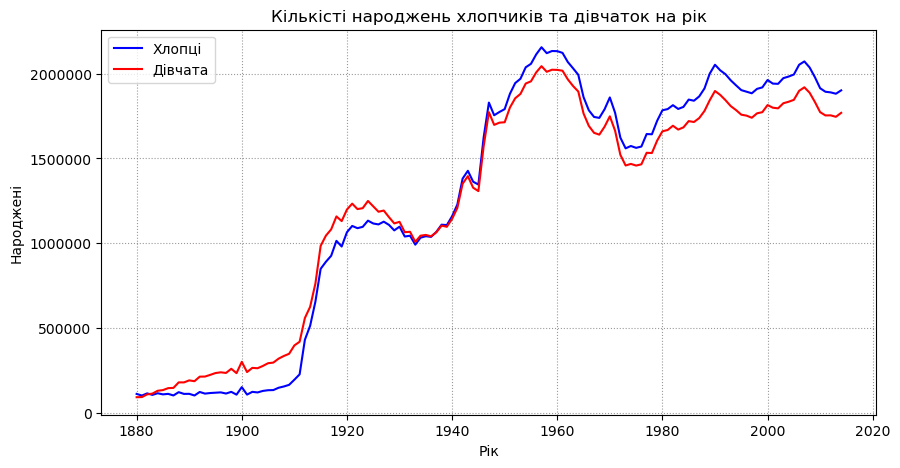

In [166]:
#19. Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік
m_f = names.groupby(['Year', 'Gender'])['Count'].sum().unstack()
plt.figure(figsize=(10,5))

plt.plot(m_f.index,m_f['M'],label='Хлопці',color='blue')
plt.plot(m_f.index,m_f['F'],label='Дівчата',color='red')
plt.grid(True,linestyle=':',color='grey',alpha=0.8)
plt.title('Кількісті народжень хлопчиків та дівчаток на рік')
plt.xlabel('Рік')
plt.ylabel('Народжені')
plt.legend()

plt.ticklabel_format(style='plain', axis='y') # відобразити повні великі числа на осі Y

In [168]:
#20. Підрахуйте кількість гендерно-нейтральних імен (однакових для дівчат та хлопців)
neutral = names.groupby('Name')['Gender'].nunique()
neutral_kil = neutral[neutral > 1].count()
print("Кількість гендерно-нейтральних імен:",neutral_kil)

Кількість гендерно-нейтральних імен: 10221


In [170]:
#21. Порахуйте, скільки разів хлопчиків називали Barbara
kilN = names[(names['Name'] == 'Barbara') & (names['Gender'] == 'M')]['Count'].sum()
print("Хлопців з ім'ям <Barbara> :",kilN)

Хлопців з ім'ям <Barbara> : 4139


In [179]:
#23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)
neutrName = names.groupby('Name').filter(lambda x: x['Gender'].nunique() > 1) #гендерно нейтральні імена
#тількиті імена, які є в кожному році
years = names['Year'].nunique()
namesInYear = neutrName.groupby('Name').filter(lambda x: x['Year'].nunique() == years) 
#загальна кількість народжень для кожного імені
popularNeutrName = namesInYear.groupby('Name')['Count'].sum().sort_values(ascending=False).reset_index()
popularNeutrName.columns = ['Name', 'TotalCount']  # перейменування колонок
popularNeutrName

,Name,TotalCount
0,James,5129096
1,John,5106590
2,Robert,4816785
3,Michael,4330805
4,Mary,4130441
...,...,...
818,Christ,3686
819,Nevada,3461
820,Price,3386
821,Levy,3116


## **filter** — це функція у бібліотеці Pandas,дозволяє вибирати рядки або групи рядків із DataFrame, базуючись на певній умові. Вона працює з об'єктами DataFrame і GroupBy,приймає функцію, яка повертає True або False для кожної групи чи рядка.

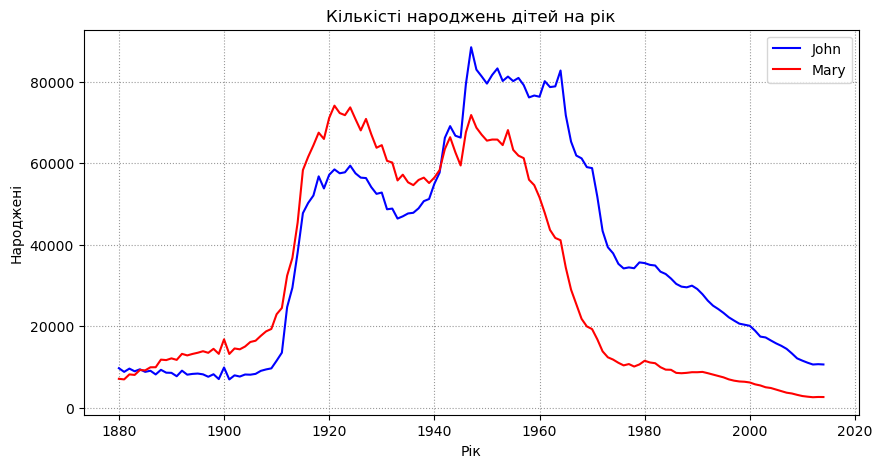

In [175]:
#25. Побудувати графіки розподілення кількості імен John та Mary по роках без залежності до статі
plt.figure(figsize=(10,5))
john = names[names['Name']=='John'].groupby('Year')['Count'].sum()
mary = names[names['Name']=='Mary'].groupby('Year')['Count'].sum()

plt.plot(john.index,john.values,label='John',color='blue')
plt.plot(mary.index,mary.values,label='Mary',color='red')
plt.grid(True,linestyle=':',color='grey',alpha=0.8)
plt.title('Кількісті народжень дітей на рік')
plt.xlabel('Рік')
plt.ylabel('Народжені')
plt.legend()

plt.ticklabel_format(style='plain', axis='y') # відобразити повні великі числа на осі Y

In [177]:
#27. Знайти найпопулярніші імена в кожному році.
popularname = names.loc[names.groupby(['Year'])['Count'].idxmax()]
popularname[['Year','Name','Count']]

,Year,Name,Count
942,1880,John,9655
2938,1881,John,8769
4963,1882,John,9557
7116,1883,John,8894
9318,1884,John,9388
...,...,...,...
1657592,2010,Isabella,22883
1691633,2011,Sophia,21816
1725502,2012,Sophia,22267
1759186,2013,Sophia,21147
